In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Subtask 1: Implement the map, plot the evolution of x

### The main formula

In [5]:
def formula(r, x):
    return r * x * (1 - x)

### Calculation of x values for a certain value of r

In [6]:
def calculation(r, x0, total_number):
    x = np.empty(0, dtype=np.float32)
    x = np.append(x, x0)
    for i in range(1, total_number):
        x_next = r * x[i-1] * (1 - x[i-1])
        x = np.append(x, x_next)
    return x

### Plotting the evolution of x depending on r

In [16]:
def PlotEvolution(r, x0, number_of_steps, ax = None, bx = None):
    t = np.linspace(0, 1)
    ax.plot(calculation(r, x0, number_of_steps), '.-k', lw = 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$", fontsize = 15)
    bx.plot(t, formula(r, t), 'k', lw = 2)
    bx.plot([0, 1], [0, 1], 'k', lw = 2)
    
    x = x0
    for i in range(number_of_steps):
        y = formula(r, x)
        bx.plot([x, x], [x, y], ':k', lw = 1.3)
        bx.plot([x, y], [y, y], ':k', lw = 1.3)
        bx.plot([x], [y], 'ob', ms = 10, alpha = (i + 1) / number_of_steps)
        x = y
    
    bx.set_xlim(0, 1)
    bx.set_ylim(0, 1)

### Main function call

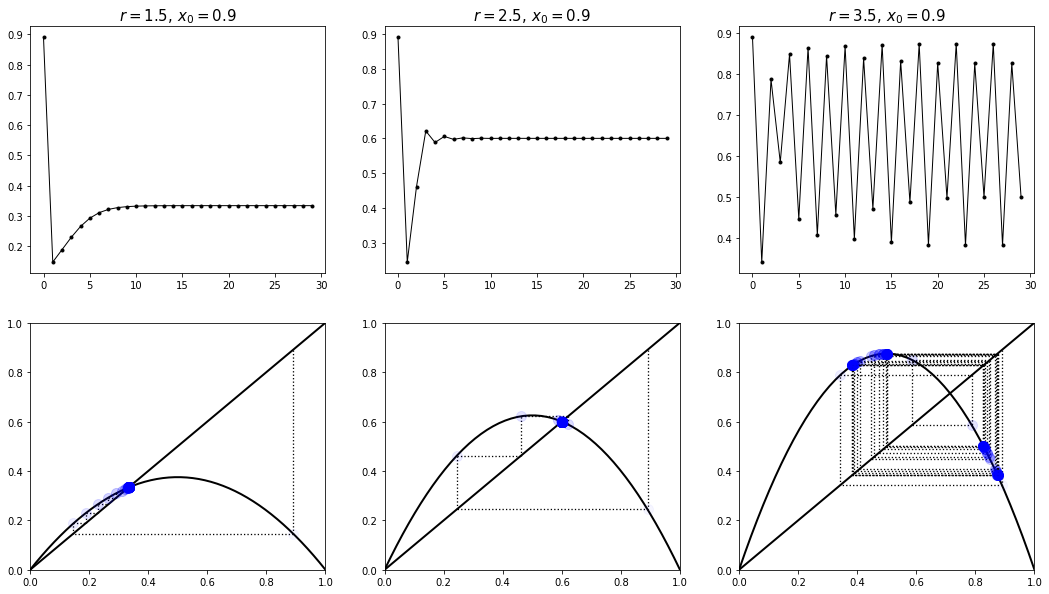

In [19]:
x0 = np.random.sample()
number_of_steps = 30
r = [1.5, 2.5, 3.5]

fig, ((graph1, graph2, graph3), (graph4, graph5, graph6)) = plt.subplots(2, 3, figsize = (18, 10))

PlotEvolution(r[0], x0, number_of_steps, ax = graph1, bx = graph4)
PlotEvolution(r[1], x0, number_of_steps, ax = graph2, bx = graph5)
PlotEvolution(r[2], x0, number_of_steps, ax = graph3, bx = graph6)

## Subtask 2: Create a linspace of r’s, for every r save the last “m” values of x after the first “n” values (can be m=200, x=200), play around with values

## Subtask 3: Plot the bifurcation map

### Creation of a linspace of r's and Plotting the bifurcation map 

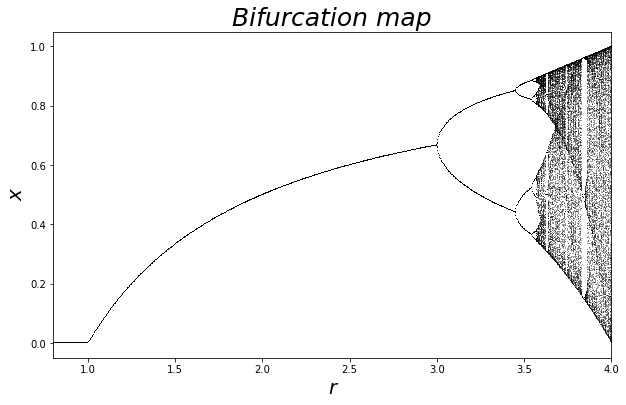

In [20]:
x0 = np.random.sample()
number_of_steps = 700
last = 200

fig, graph = plt.subplots(1, 1, figsize = (10, 6))

for r in np.linspace(0, 4, 1000):
    x = calculation(r, x0, number_of_steps)
    y = x[number_of_steps - last:number_of_steps]    
    graph.plot(np.ones(last) * r, y, ',k', alpha = 0.4)
    
graph.set_title('Bifurcation map', fontsize = 25, fontstyle = 'oblique')
graph.set_xlim(0.8, 4)
plt.xlabel('r', fontsize = 20, fontstyle = 'oblique')
plt.ylabel('x', fontsize = 20, fontstyle = 'oblique')

plt.show()